In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split

from bikesharing.ml_logic.model import get_folds, train_test_indices
from bikesharing.interface.main import *
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#preprocess()

In [3]:
df_X = pd.read_csv('~/.lewagon/bikesharing/data/processed/X_processed_from_2019_to_2022.csv')
df_y = pd.read_csv('~/.lewagon/bikesharing/data/processed/y_processed_from_2019_to_2022.csv')

In [4]:
df_X

,temperature_2m,relativehumidity_2m,apparent_temperature,windspeed_10m,precipitation,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,is_holiday,is_weekend
0,0.355408,1.000000,0.342007,0.227848,0.017391,0.629410,0.982963,0.75,0.933013,0.600779,0.989739,1,0
1,0.357616,0.987013,0.340149,0.245570,0.008696,0.750000,0.933013,0.75,0.933013,0.600779,0.989739,1,0
2,0.359823,1.000000,0.336431,0.303797,0.017391,0.853553,0.853553,0.75,0.933013,0.600779,0.989739,1,0
3,0.359823,0.987013,0.332714,0.341772,0.008696,0.933013,0.750000,0.75,0.933013,0.600779,0.989739,1,0
4,0.359823,1.000000,0.332714,0.356962,0.000000,0.982963,0.629410,0.75,0.933013,0.600779,0.989739,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,0.426049,0.779221,0.405204,0.202532,0.000000,0.066987,0.750000,0.50,1.000000,0.500000,1.000000,0,1
35036,0.412804,0.779221,0.395911,0.172152,0.000000,0.146447,0.853553,0.50,1.000000,0.500000,1.000000,0,1
35037,0.410596,0.753247,0.390335,0.182278,0.000000,0.250000,0.933013,0.50,1.000000,0.500000,1.000000,0,1
35038,0.417219,0.714286,0.390335,0.222785,0.000000,0.370590,0.982963,0.50,1.000000,0.500000,1.000000,0,1


In [5]:
df_X_y = pd.concat((df_X, df_y) , axis=1)

In [6]:
districts = ['Altstadt-Lehel', 'Au - Haidhausen',
       'Aubing-Lochhausen-Langwied', 'Berg am Laim', 'Bogenhausen',
       'Feldmoching', 'Hadern', 'Harlaching', 'Hasenbergl-Lerchenau Ost',
       'Laim', 'Lochhausen', 'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt',
       'Milbertshofen-Am Hart', 'Moosach', 'Neuhausen-Nymphenburg',
       'Obergiesing', 'Obermenzing', 'Obersendling', 'Pasing',
       'Pasing-Obermenzing', 'Ramersdorf-Perlach', 'Schwabing-Freimann',
       'Schwabing-West', 'Schwanthalerhöhe', 'Sendling', 'Sendling-Westpark',
       'Südgiesing', 'Thalkirchen', 'Trudering', 'Trudering-Riem',
       'Untergiesing', 'Untergiesing-Harlaching', 'Untermenzing-Allach']

In [7]:
fold_dfs = get_folds(df_X_y, fold_length=FOLD_LENGTH, fold_stride=FOLD_STRIDE)

In [31]:
models = []
district_score_means = []

for dist in districts:
    scores = []

    indices = [0, 1, 2, 3]
        
    for id in range(4):
        model = KNeighborsRegressor(n_neighbors=3, p=1)
        test_df = fold_dfs[id]
        train_folds = [fold_dfs[i] for i in indices if i != id]
        
        train_df = pd.concat(train_folds, axis=0)
        X_test = test_df.drop(columns= districts)
        y_test = test_df[dist]
        X_train = train_df.drop(columns= districts)
        y_train = train_df[dist]
        
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
        # models.append
        print(f"{id} >>> {scores=}")
        
    district_score_means.append(np.mean(scores))

0 >>> scores=[0.5472939326560263]
1 >>> scores=[0.5472939326560263, 0.588685472182042]
2 >>> scores=[0.5472939326560263, 0.588685472182042, 0.5255234160650677]
3 >>> scores=[0.5472939326560263, 0.588685472182042, 0.5255234160650677, 0.502946659821492]
0 >>> scores=[0.37015622433784046]
1 >>> scores=[0.37015622433784046, 0.46463093449172777]
2 >>> scores=[0.37015622433784046, 0.46463093449172777, 0.44663178235541334]
3 >>> scores=[0.37015622433784046, 0.46463093449172777, 0.44663178235541334, 0.42274153138508197]
0 >>> scores=[-0.16848313404137505]
1 >>> scores=[-0.16848313404137505, -0.049751841404962915]
2 >>> scores=[-0.16848313404137505, -0.049751841404962915, -0.42032608392151394]
3 >>> scores=[-0.16848313404137505, -0.049751841404962915, -0.42032608392151394, -15.6066239455382]
0 >>> scores=[0.21487251253076656]
1 >>> scores=[0.21487251253076656, 0.2340083853946261]
2 >>> scores=[0.21487251253076656, 0.2340083853946261, 0.06960439942770247]
3 >>> scores=[0.21487251253076656, 0.234

In [32]:
scores_df = pd.DataFrame(district_score_means, columns=['score'], index=districts)

In [33]:
scores_df.sort_values(by=['score'], inplace=True) 

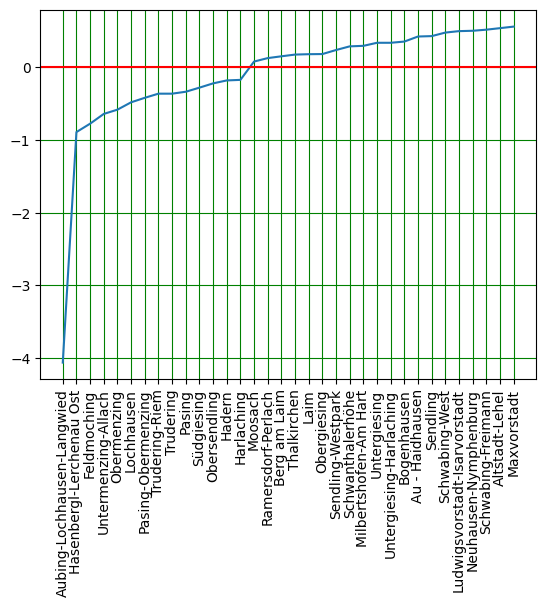

In [34]:
plt.plot(scores_df.index, scores_df['score'])
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(c='g')


plt.show()

In [35]:
print(f"mean = {np.mean(district_score_means)}")
print(f"min = {np.min(district_score_means)}")
print(f"max = {np.max(district_score_means)}")

mean = -0.08826793506748255
min = -4.061296251226513
max = 0.5624272429456743


# RMSE

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
models = []
district_score_means = []

for dist in districts:
    scores_list = []

    indices = [0, 1, 2, 3]
        
    for id in range(4):
        model = KNeighborsRegressor(n_neighbors=3, p=1)

        test_df = fold_dfs[id]
        train_folds = [fold_dfs[i] for i in indices if i != id]
        
        train_df = pd.concat(train_folds, axis=0)
        X_test = test_df.drop(columns= districts)
        y_test = test_df[dist]
        X_train = train_df.drop(columns= districts)
        y_train = train_df[dist]
        

        model.fit(X_train, y_train)
        y_pred = [x if x >= 0 else 0 for x in model.predict(X_test)]
        # scores = r2_score(y_test , y_pred)
        scores = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
        scores_list.append(scores)
        print(f"{id} >>> scores={scores_list}")
        
        
    scores_array = np.array(scores)
    district_score_means.append(np.mean(scores_array.flatten()))

0 >>> scores=[6.092170037732479]
1 >>> scores=[6.092170037732479, 5.840673789866602]
2 >>> scores=[6.092170037732479, 5.840673789866602, 5.2887597032174245]
3 >>> scores=[6.092170037732479, 5.840673789866602, 5.2887597032174245, 5.7820818765381885]
0 >>> scores=[3.00909327099484]
1 >>> scores=[3.00909327099484, 3.0404198253461963]
2 >>> scores=[3.00909327099484, 3.0404198253461963, 2.8541339614164585]
3 >>> scores=[3.00909327099484, 3.0404198253461963, 2.8541339614164585, 3.050186926094815]
0 >>> scores=[0.8602723366182856]
1 >>> scores=[0.8602723366182856, 0.9669972667235606]
2 >>> scores=[0.8602723366182856, 0.9669972667235606, 0.7184422802111012]
3 >>> scores=[0.8602723366182856, 0.9669972667235606, 0.7184422802111012, 0.6698080478040667]
0 >>> scores=[1.4872619976384396]
1 >>> scores=[1.4872619976384396, 1.4858157361619524]
2 >>> scores=[1.4872619976384396, 1.4858157361619524, 1.413827847779127]
3 >>> scores=[1.4872619976384396, 1.4858157361619524, 1.413827847779127, 1.466715960151

In [38]:
scores_df = pd.DataFrame(district_score_means, columns=['score'], index=districts)

In [39]:
scores_df.sort_values(by=['score'], inplace=True) 

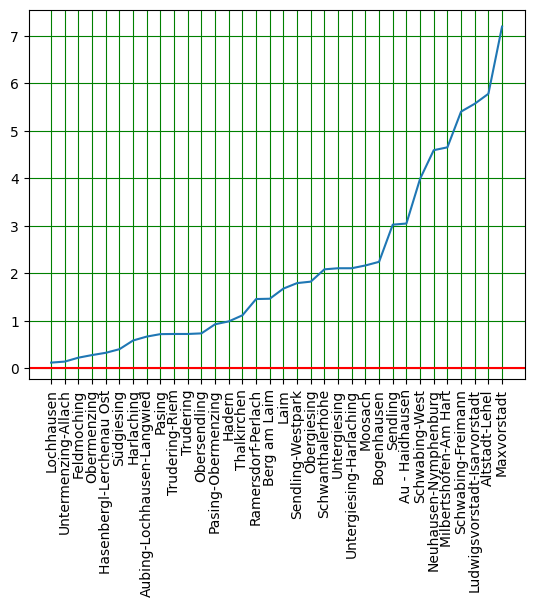

In [40]:
plt.plot(scores_df.index, scores_df['score'])
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(c='g')


plt.show()